# Central Limit Theorem 

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-mc62jfr2
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-mc62jfr2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 15.7 MB/s 
     |████████████████████████████████| 72 kB 344 kB/s 
  Created wheel for probml-utils: filename=probml_utils-0.1.dev50+g413eabd-py3-none-any.whl size=32388 sha256=7d971f89bcad6016fa525354edc055e38e504fd922fef529a08b385ce550b943
  Stored in directory: /tmp/pip-ephem-wheel-cache-1yzf0ubu/wheels/37/8f/cb/b845cd5de3d7f648717815f9c27bec49975bf58637a97fa6be
  Created wheel for TexSoup: filename=TexSoup-0.3.1-py3-none-any.whl size=27666 sha256=4cf8e84ec26bebd40c8cb0eeafcf255daf31bd3bcacfca4a600e07a6b2e79726
  Stored in directory: /root/.cache/pip/wheels/2b/8e/c6/7ee3f9f9776fd18c0ccb04492902ed42225b6dfab3c68f14c0
Successfully b

In [3]:
latexify(width_scale_factor=2, fig_height=1.85)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [4]:
def calcMean(keys, N):
    # Generates N random numbers from 1 to 5 and calculates their mean.
    x = jnp.mean(jax.random.beta(keys, 1, 5, [1, N]))
    return x

In [14]:
def plot_convolutionHist(mean_list, N, sampleSize, bins):
    counts, nbinslocation = jnp.histogram(mean_list, bins=20)
    counts = counts / (sampleSize / bins)

    plt.figure()
    plt.title(f"N = {N}")
    plt.bar(nbinslocation[:-1], counts, width=0.02, color="black", align="edge")

    plt.xticks(jnp.linspace(0, 1, 3))
    plt.yticks(jnp.linspace(0, 3, 4))
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.xlabel("$bins$")
    plt.ylabel("$Frequency\ (\mu)$")
    sns.despine()
    savefig(f"clt_N_{N}_latexified")

In [15]:
key = jax.random.PRNGKey(1)
keys = jax.random.split(key, num=10000)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


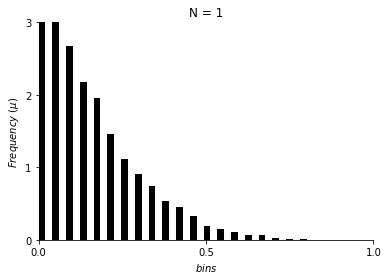

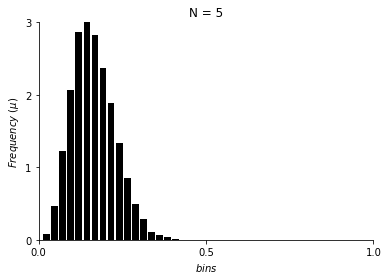

In [16]:
sampleSize = 10000
bins = 20
N_array = [1, 5]
for N in N_array:
    means = jax.vmap(calcMean, in_axes=(0, None), out_axes=0)
    out = means(keys, N)
    plot_convolutionHist(out, N, sampleSize, bins)

In [ ]:
from ipywidgets import interact


@interact(N_value=(1, 10))
def generate_random(N_value):
    sampleSize = 100000
    bins = 20
    means = jax.vmap(calcMean, in_axes=(0, None), out_axes=0)
    out = means(keys, N_value)
    plot_convolutionHist(out, N_value, sampleSize, bins)